Zachary Brooks: Seller, Invests in historical houses, best neighborhoods, high profits, best timing within a year, should renovate?


What is historical?
- mean of set?
- oldest?
- more than 80 years?
-> lower 30% until 1935/40!
- check unique values of years_built, renovated, to be sure there arent only 
- maybe replace built year with yr_renovated if there is no values


Best neighborhoods? -> most expensive/desired ones
- most potential price wise
- most expensive ones, highest average rating
- least time between **datedate and **view or **datedate
- check **view as an indicator for popularity? - connection  


Best timing for selling/ buying in those areas
- check for distinctive patterns in **datedate
- 


Should renovate?
- How much does value differ if renovated?
- time between **datedate and **year_renovated?
- set duration since last renovation (if higher -> renovate)
**condition
**grade
**view

Depending on area?
- whats prices and conditions in other comparable houses of same areas?
- when are prices lowest, when highest? (1 year)
- 

Customers with a lot of money do prefer ready to move in houses?!
- do top **condition **grade houses sell fast? Whats the mean?


Hypothesis:

general:
- older houses in best neighborhoods are expensive and mostly in good condition (no renovation needed/ not worth it because of monument protection reasons)
- houses get sold more often during autumn and spring time (check for news that might cause value increase/decrease ..)

Customer:

(- if houses condition is not good, the investment is probably not worth it?!(higher prices after renovation?) (high material costs since covid))
- Historical houses are an expensive niche, rich people prefer new ones. (compare **price and **built_year, **date)
(- there are not that many old houses (older than x, 80 years probably))

-> old houses are built in a style that differs from modern houses. Other materials, architecture that was common during their built period. **grade and **built_year 


______
- Check connections between price and different variables
- 

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
# import data
df = pd.read_csv("data/King_County_House_prices_dataset.csv")

# as column 'condition' is truncated in the display, disable column truncation
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None) 
pd.set_option('display.max_colwidth', -1)
df

/var/folders/jr/p21bhxh16zs45yz56c_h0pbw0000gn/T/ipykernel_17853/163725736.py:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [82]:
# drop columns that are not useful
df = df.drop(["lat", "long" ],axis=1)



In [160]:
df_unique_yr_renovated = df["yr_renovated"].nunique()
print(sorted(df_unique_yr_renovated))

TypeError: 'int' object is not iterable

In [112]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,98077.951845,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,53.513072,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,98001.000000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,98033.000000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,98065.000000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,98118.000000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,98199.000000,6210.000000,871200.000000


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

In [84]:
# check for duplicate rows in id column, dont drop now. Probably a house with several units
df["id"].duplicated().value_counts()

False    21420
True     177  
Name: id, dtype: int64

In [101]:
# convert trending_date and publish_time into datetime and extract date part from publish_time
# format specifies the present form of our argument we pass into the function
df['date'] = pd.to_datetime(df['date'])
df['yr_built'] = pd.to_datetime(df['yr_built'], format="%Y")
df['yr_renovated'] = pd.to_datetime(df['yr_renovated'], format="%y-%m-%d")
# use .year .month function
# df.date.dt.month




In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  datetime64[ns]
 15  yr_renovated   1775

In [102]:
df['yr_renovated'].dtype

dtype('<M8[ns]')

In [103]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955-01-01,1970-01-01 00:00:00.000000000,98178,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951-01-01,1970-01-01 00:00:00.000001991,98125,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933-01-01,NaT,98028,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965-01-01,1970-01-01 00:00:00.000000000,98136,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987-01-01,1970-01-01 00:00:00.000000000,98074,1800,7503


In [104]:
df["yr_built"].min()

Timestamp('1900-01-01 00:00:00')

In [105]:
df["date"].describe

<bound method NDFrame.describe of 0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]>

In [106]:
df.shape

(21597, 19)

In [107]:
# data cleaning
# check for missing values
df.isnull().sum()
# waterfront 0 = False, 1 = True -> look for nan and delete or not
# view: 0 to 4 on how good the view of property was -> nulls are ok
# yr_renovated: 

id               0   
date             0   
price            0   
bedrooms         0   
bathrooms        0   
sqft_living      0   
sqft_lot         0   
floors           0   
waterfront       2376
view             63  
condition        0   
grade            0   
sqft_above       0   
sqft_basement    0   
yr_built         0   
yr_renovated     3842
zipcode          0   
sqft_living15    0   
sqft_lot15       0   
dtype: int64

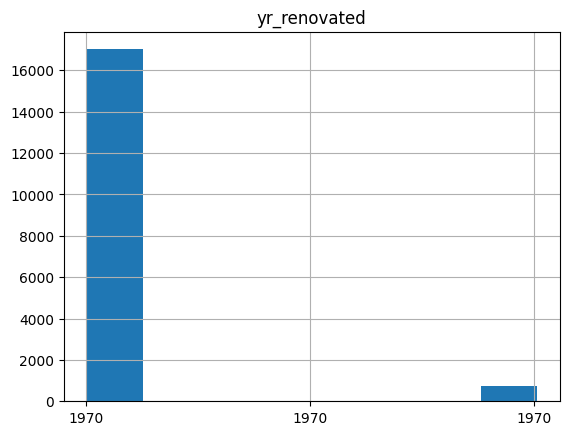

In [111]:
# renovation column is useless
df.hist(column="yr_renovated", bins=8);

array([[<AxesSubplot:title={'center':'yr_built'}>]], dtype=object)

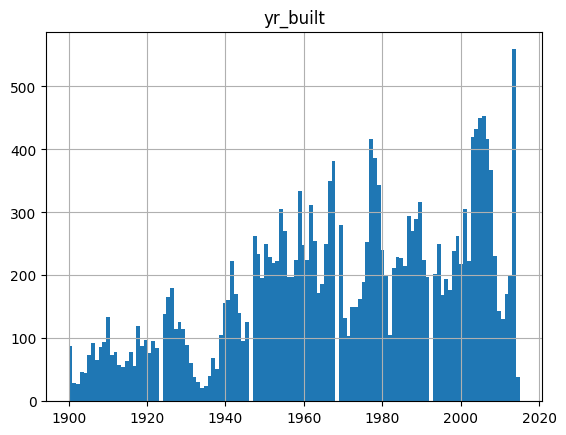

In [118]:
df.hist(column="yr_built", bins=120)

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

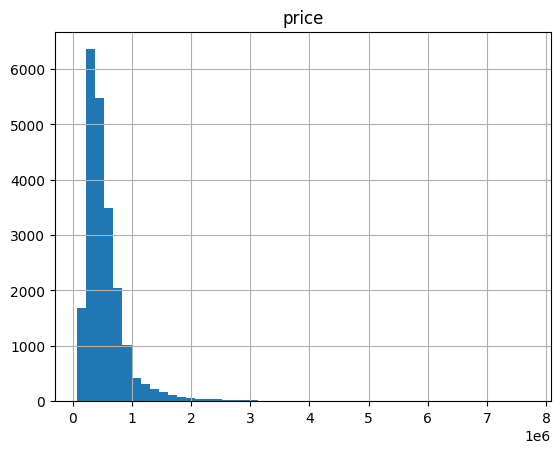

In [122]:
df.hist(column="price", bins=50)

<AxesSubplot:xlabel='yr_built', ylabel='price'>

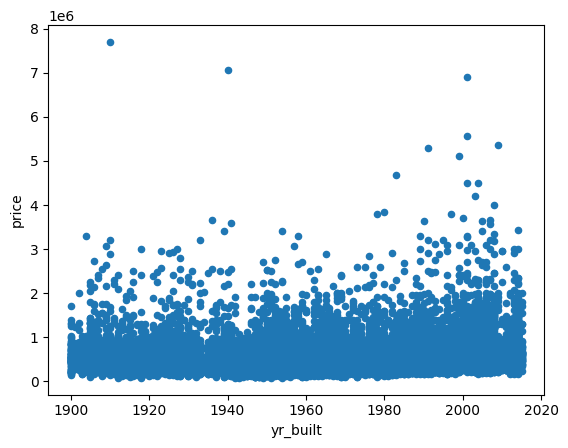

In [126]:
# correlation time/price?!
df.plot.scatter(x="yr_built", y="price", s=20)

<AxesSubplot:xlabel='yr_built', ylabel='grade'>

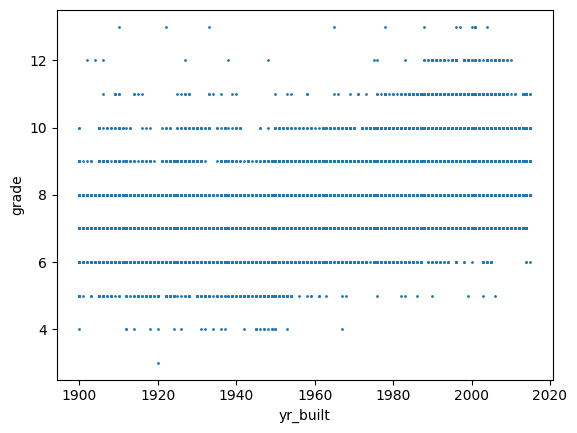

In [154]:
# year built/condition/grade
df.plot.scatter(x="yr_built", y="grade", s=1)

<AxesSubplot:xlabel='condition', ylabel='yr_built'>

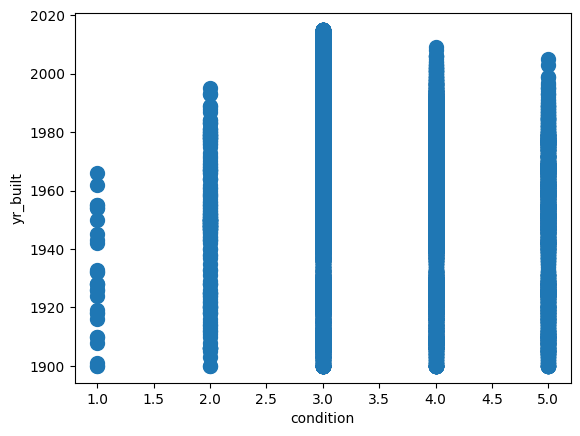

In [130]:
# shitty one
df.plot.scatter(x="condition", y="yr_built", s=100)

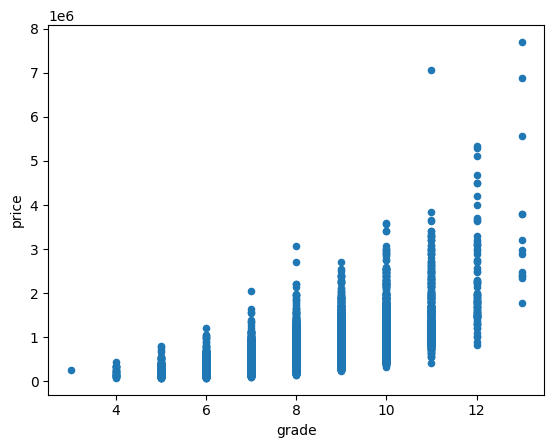

In [155]:
# calculate corr between grade/price and condition/price grade seems to be correlated, condition not so much. But renovation
# is more connected to condition?!
df.plot.scatter(x="grade", y="price");


<AxesSubplot:xlabel='condition', ylabel='price'>

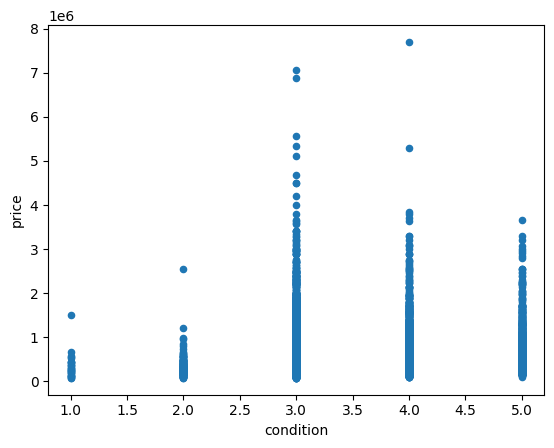

In [152]:
df.plot.scatter(x="condition", y="price")

<AxesSubplot:xlabel='yr_built', ylabel='grade'>

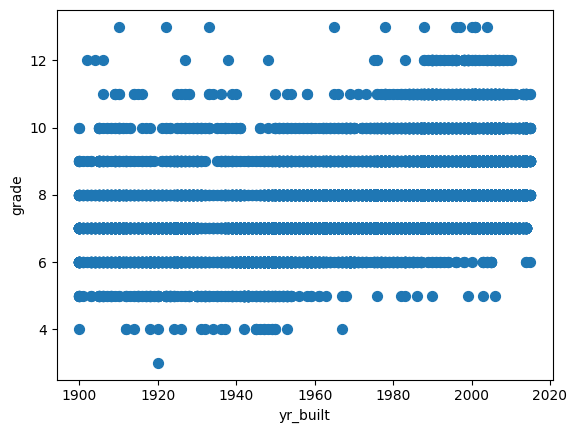

In [137]:
#shit one
df.plot.scatter(x="yr_built", y="grade", s=50)

<AxesSubplot:xlabel='zipcode', ylabel='price'>

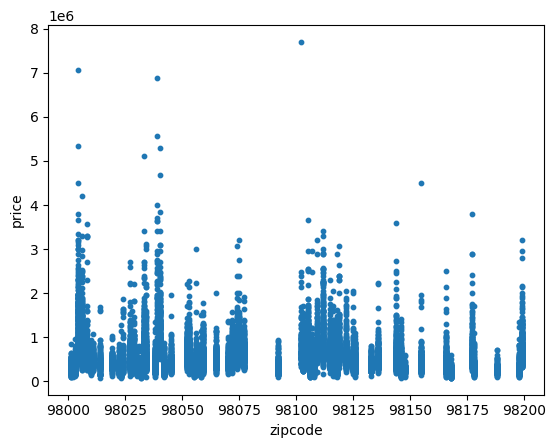

In [141]:
df.plot.scatter(x="zipcode", y="price", s=10)

array([[<AxesSubplot:title={'center':'date'}>]], dtype=object)

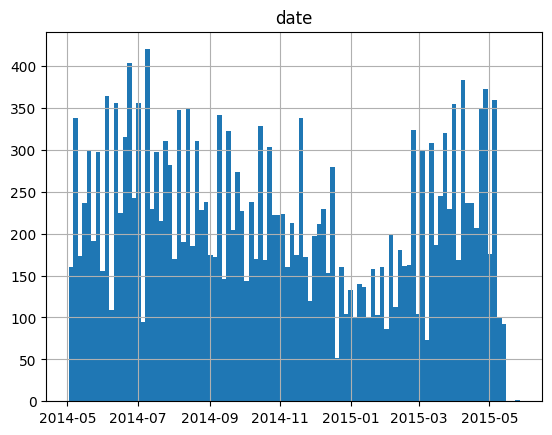

In [147]:
df.hist(column="date", bins=100)

KeyError: "None of [Index(['yr_built'], dtype='object')] are in the [columns]"

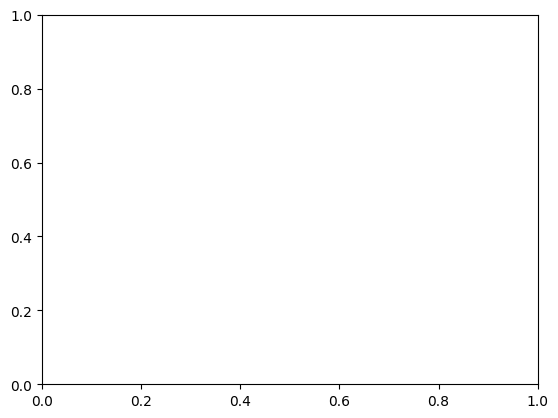

In [149]:
box_pl = df.boxplot(column="yr_built")
box_pl.plot()

# round floats

In [98]:
df["yr_renovated"]

0       1970-01-01 00:00:00.000000000
1       1970-01-01 00:00:00.000001991
2       NaT                          
3       1970-01-01 00:00:00.000000000
4       1970-01-01 00:00:00.000000000
                     ...             
21592   1970-01-01 00:00:00.000000000
21593   1970-01-01 00:00:00.000000000
21594   1970-01-01 00:00:00.000000000
21595   1970-01-01 00:00:00.000000000
21596   1970-01-01 00:00:00.000000000
Name: yr_renovated, Length: 21597, dtype: datetime64[ns]

In [158]:
df['yr_renovated'].nunique()
#df_unique_yr_renovated = df["yr_renovated"].head(70)
print(sorted(df_unique_yr_renovated))
# renovation does increase the price: replace all 0 with nan!  

[Timestamp('1970-01-01 00:00:00'), Timestamp('1970-01-01 00:00:00.000001991'), NaT, Timestamp('1970-01-01 00:00:00'), Timestamp('1970-01-01 00:00:00'), Timestamp('1970-01-01 00:00:00'), Timestamp('1970-01-01 00:00:00'), Timestamp('1970-01-01 00:00:00'), Timestamp('1970-01-01 00:00:00'), Timestamp('1970-01-01 00:00:00'), Timestamp('1970-01-01 00:00:00'), Timestamp('1970-01-01 00:00:00'), NaT, Timestamp('1970-01-01 00:00:00'), Timestamp('1970-01-01 00:00:00'), Timestamp('1970-01-01 00:00:00'), Timestamp('1970-01-01 00:00:00'), Timestamp('1970-01-01 00:00:00'), Timestamp('1970-01-01 00:00:00'), Timestamp('1970-01-01 00:00:00'), Timestamp('1970-01-01 00:00:00'), Timestamp('1970-01-01 00:00:00'), Timestamp('1970-01-01 00:00:00'), NaT, Timestamp('1970-01-01 00:00:00'), Timestamp('1970-01-01 00:00:00'), NaT, Timestamp('1970-01-01 00:00:00'), NaT, Timestamp('1970-01-01 00:00:00'), Timestamp('1970-01-01 00:00:00'), Timestamp('1970-01-01 00:00:00'), Timestamp('1970-01-01 00:00:00'), Timestamp('1

In [ ]:
# make column with month sold

In [ ]:
# feature engineering?

In [ ]:
#days between renovating and selling? Price?